In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



In [2]:
#reading in dga
dga_dataframe = pd.read_csv('dga.csv', index_col = False)
dga_dataframe = dga_dataframe[dga_dataframe['class'] == 'dga']
dga_dataframe.drop(['host', 'subclass'], axis = 1, inplace = True)


In [3]:
#reading in legit 
legit_file = open("dns_top10000_domains_20170308.txt", "r").readlines()
legit_dataframe = pd.DataFrame(data = {'domain' : legit_file})
legit_dataframe['class'] = 'legit'
legit_dataframe['domain'] = legit_dataframe['domain'].apply(lambda x : x.split('.')[0].lower())


In [4]:
#cleaning data and shuffling
legit_dataframe.drop_duplicates(subset = 'domain', inplace = True)

legit_dataframe = legit_dataframe.sample(frac = 1).reset_index(drop = True)
dga_dataframe = dga_dataframe.sample(frac = 1).reset_index(drop = True)


In [5]:
#df dataset is comprised of 8000 legit samples, 2000 illegit samples
#80 20 split between dataset and test set - 2000 for hold out
#may do stratified random sampling next time to get better data
legit_dataframe = legit_dataframe[:8000]
dga_dataframe = dga_dataframe[:2000]
df = pd.concat([legit_dataframe, dga_dataframe])
df = df.sample(frac = 1.0).reset_index(drop = True) 
hold_df = df[:2000].reset_index(drop = True)
hold_df.dropna()
train_df = df[2000:].reset_index(drop = True)
train_df.dropna()


,domain,class
0,1idhfioj9vpog1rqjeaf1j12dwc,dga
1,50zera,legit
2,399wan,legit
3,oppomobile,legit
4,cymzc,legit
5,mnvkffeavcydpnwklrteimbc,dga
6,110yfwk1l1kie11dx2y8aqlqrlm,dga
7,tdxcdn,legit
8,campfiregames,legit
9,56go,legit


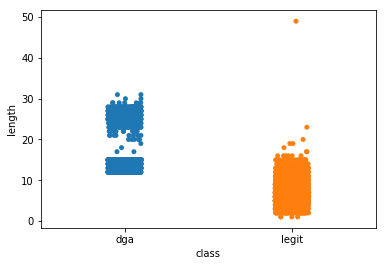

In [6]:
#adding features length, entropy, n-gram vectorization
train_df['length'] = train_df.apply(lambda row: len(row.domain), axis = 1)
hold_df['length'] = hold_df.apply(lambda row: len(row.domain), axis = 1)
#jitter makes it easier to see the distributions
sns.stripplot(x = "class", y = "length", data = train_df, jitter = True)
plt.show()
#clearly by the strip plot, dga's have longer base names

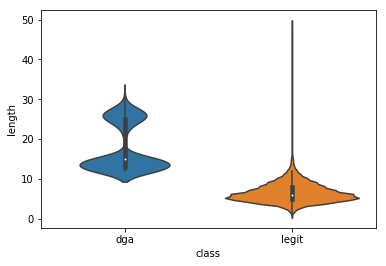

In [7]:
#shows distributions
sns.violinplot(x = "class", y = "length", data = train_df)
plt.show() 

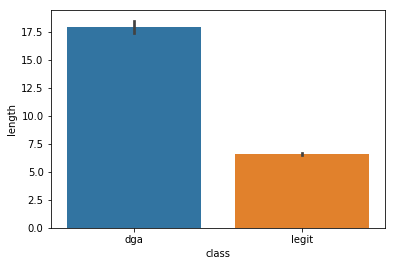

In [8]:
#shows bar graphs 
sns.barplot(x = "class", y = "length", data = hold_df)
plt.show() 

In [9]:
import math
from collections import Counter

def entropy(s):
    p, length = Counter(s), float(len(s))
    return -sum([count / length * math.log(count / length, 2) for count in p.values()])

#print(entropy("1223334444"))


In [10]:
train_df['entropy'] = train_df['domain'].apply(lambda x : entropy(x))
hold_df['entropy'] = hold_df['domain'].apply(lambda x : entropy(x))
train_df

,domain,class,length,entropy
0,1idhfioj9vpog1rqjeaf1j12dwc,dga,27,3.986188
1,50zera,legit,6,2.584963
2,399wan,legit,6,2.251629
3,oppomobile,legit,10,2.646439
4,cymzc,legit,5,1.921928
5,mnvkffeavcydpnwklrteimbc,dga,24,4.001629
6,110yfwk1l1kie11dx2y8aqlqrlm,dga,27,3.782122
7,tdxcdn,legit,6,2.251629
8,campfiregames,legit,13,3.238901
9,56go,legit,4,2.000000


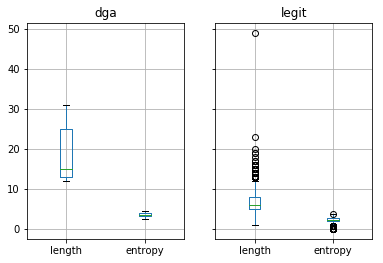

In [11]:
plt.figure()
train_df.groupby('class').boxplot()
plt.show()

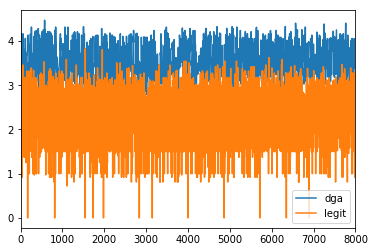

In [12]:
plt.figure()
train_df.groupby('class')['entropy'].plot(legend = True)
plt.show()

In [13]:
import sklearn.feature_extraction
#computing 3, 4, and 5 gram
#using top 10000 to get a vectorizer which can fit to a set of data, getting the 3, 4, and 5 gram
#and then transform a data into a set into a document-term matrix consisting of ones and zeros
dns_file = open("dns_top10000_domains_20170308.txt", "r").readlines()
dns_dataframe = pd.DataFrame(data = {'domain' : legit_file})
dns_dataframe['domain'] = dns_dataframe['domain'].apply(lambda x : x.split('.')[0].lower())
dns_dataframe.drop_duplicates(subset = 'domain', inplace = True)

dns_vc = sklearn.feature_extraction.text.CountVectorizer(analyzer = 'char', ngram_range = (3, 5), min_df = 3, max_df = 1.0)
document_matrix = dns_vc.fit_transform(dns_dataframe['domain'])
dns_counts = np.log(document_matrix.sum(axis = 0).getA1())

ngrams_list = dns_vc.get_feature_names()
import operator
sorted_ngrams = sorted(zip(ngrams_list, dns_counts), key = operator.itemgetter(1), reverse = True)
for ngram, count in sorted_ngrams:
    print '{} {}'.format(ngram, count)

ang 5.8636311756
ian 5.64544689764
ing 5.61677109767
ong 5.36597601502
uan 5.24702407216
iao 5.16478597392
ame 5.08759633523
wan 5.06890420222
xia 5.05624580535
cdn 5.04342511692
eng 5.04342511692
han 4.96981329958
gam 4.91998092583
game 4.91998092583
jia 4.91998092583
shu 4.85203026392
you 4.84418708646
che 4.82028156561
hua 4.82028156561
shi 4.75359019111
hin 4.68213122712
bao 4.65396035016
hen 4.65396035016
xin 4.65396035016
chi 4.60517018599
dns 4.59511985013
app 4.58496747867
ina 4.58496747867
hao 4.5538768916
yun 4.5538768916
123 4.48863636973
chin 4.48863636973
hina 4.46590811865
china 4.45434729625
img 4.43081679884
xiao 4.43081679884
cha 4.40671924726
mei 4.40671924726
dia 4.39444915467
ish 4.3040650932
lou 4.3040650932
sha 4.3040650932
oud 4.29045944115
zhi 4.29045944115
cai 4.24849524205
fan 4.2341065046
zhu 4.2341065046
hang 4.21950770518
she 4.20469261939
sho 4.20469261939
heng 4.18965474203
huo 4.1743872699
wei 4.1743872699
clo 4.15888308336
lin 4.15888308336
ton 4.158883

eep 2.19722457734
eet 2.19722457734
ehu 2.19722457734
ein 2.19722457734
eke 2.19722457734
en8 2.19722457734
enc 2.19722457734
engy 2.19722457734
eno 2.19722457734
epl 2.19722457734
esi 2.19722457734
eso 2.19722457734
ete 2.19722457734
eto 2.19722457734
exin 2.19722457734
exp 2.19722457734
eyi 2.19722457734
file 2.19722457734
gbao 2.19722457734
ght 2.19722457734
gold 2.19722457734
gong 2.19722457734
gta 2.19722457734
hik 2.19722457734
hiy 2.19722457734
hush 2.19722457734
ianf 2.19722457734
ianzh 2.19722457734
iaob 2.19722457734
iaoyu 2.19722457734
iban 2.19722457734
icha 2.19722457734
iche 2.19722457734
iec 2.19722457734
igh 2.19722457734
ihua 2.19722457734
info 2.19722457734
inga 2.19722457734
ingt 2.19722457734
ingz 2.19722457734
iqug 2.19722457734
isha 2.19722457734
ishe 2.19722457734
isp 2.19722457734
itan 2.19722457734
ius 2.19722457734
iwe 2.19722457734
izi 2.19722457734
jis 2.19722457734
key 2.19722457734
ktv 2.19722457734
lec 2.19722457734
leg 2.19722457734
let 2.19722457734
lit

amp 1.38629436112
an4 1.38629436112
anap 1.38629436112
ancha 1.38629436112
anclo 1.38629436112
andao 1.38629436112
andro 1.38629436112
anet 1.38629436112
anfen 1.38629436112
anfu 1.38629436112
ang5 1.38629436112
angch 1.38629436112
angda 1.38629436112
anggo 1.38629436112
angk 1.38629436112
angli 1.38629436112
angon 1.38629436112
angr 1.38629436112
anjin 1.38629436112
anko 1.38629436112
anla 1.38629436112
anne 1.38629436112
anpi 1.38629436112
ansha 1.38629436112
anton 1.38629436112
anwo 1.38629436112
ao3 1.38629436112
ao8 1.38629436112
aoap 1.38629436112
aoban 1.38629436112
aoda 1.38629436112
aodu 1.38629436112
aoe 1.38629436112
aofa 1.38629436112
aofan 1.38629436112
aohu 1.38629436112
aojin 1.38629436112
aome 1.38629436112
aopao 1.38629436112
aoqi 1.38629436112
aoqu 1.38629436112
aoshi 1.38629436112
aoti 1.38629436112
aotia 1.38629436112
aotu 1.38629436112
aotv 1.38629436112
aoyan 1.38629436112
aoyo 1.38629436112
aozo 1.38629436112
aozou 1.38629436112
appc 1.38629436112
apple 1.3862943

hez 1.09861228867
hgc 1.09861228867
hi- 1.09861228867
hia 1.09861228867
hici 1.09861228867
hinag 1.09861228867
hinai 1.09861228867
hiqu 1.09861228867
hita 1.09861228867
hiwe 1.09861228867
hixi 1.09861228867
hiyu 1.09861228867
hizh 1.09861228867
hly 1.09861228867
hnr 1.09861228867
homek 1.09861228867
hoot 1.09861228867
hope 1.09861228867
hort 1.09861228867
horto 1.09861228867
hote 1.09861228867
hotel 1.09861228867
houj 1.09861228867
houji 1.09861228867
housh 1.09861228867
houyi 1.09861228867
hpa 1.09861228867
hrs 1.09861228867
htc 1.09861228867
hty 1.09861228867
huaba 1.09861228867
huac 1.09861228867
huaj 1.09861228867
huaji 1.09861228867
huama 1.09861228867
huanl 1.09861228867
huas 1.09861228867
huchu 1.09861228867
hud 1.09861228867
hufa 1.09861228867
huif 1.09861228867
huij 1.09861228867
huiji 1.09861228867
huiyi 1.09861228867
huk 1.09861228867
hulu 1.09861228867
huob 1.09861228867
huoc 1.09861228867
huoch 1.09861228867
huod 1.09861228867
huok 1.09861228867
huom 1.09861228867
huoma 1.

In [14]:
def ngram_count(domain):
    total_match = dns_counts * dns_vc.transform([domain]).T
    print '%.2f total matches' %(total_match)
    
ngram_count('google')
ngram_count('baidu')
ngram_count('weibo')
ngram_count('beyonce')
ngram_count('bey666on4ce')


18.42 total matches
16.67 total matches
14.01 total matches
10.50 total matches
4.48 total matches


In [15]:
train_df['ngram'] = dns_counts * dns_vc.transform(train_df['domain']).T
hold_df['ngram'] = dns_counts * dns_vc.transform(hold_df['domain']).T
train_df.sort_values(by = 'ngram', ascending = True).head(100)
train_df.describe()

,length,entropy,ngram
count,8000.000000,8000.000000,8000.000000
mean,8.756500,2.566778,11.832314
std,5.587384,0.684172,13.865148
min,1.000000,-0.000000,0.000000
25%,5.000000,2.148751,2.079442
50%,7.000000,2.521641,6.697034
75%,10.000000,3.000000,16.969277
max,49.000000,4.469670,93.956869


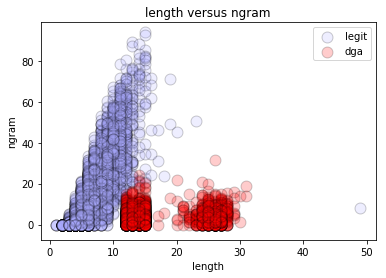

In [16]:
conditional = train_df['class'] == 'dga'
dga = train_df[conditional]
legit = train_df[~conditional]
def scatter_plot_features():
    fig, ax1 = plt.subplots(1, 1, sharey = True)
    #plt.scatter(legit['entropy'], legit['alexa_grams'],  s=120, c='#aaaaff', label='Alexa', alpha=.2)
    ax1.scatter(legit['length'], legit['ngram'], s = 120, c = '#aaaaff', label = 'legit', alpha = 0.2, edgecolor = 'black')
    ax1.scatter(dga['length'], dga['ngram'], s = 120, c = 'red', label = 'dga', alpha = 0.2, edgecolor = 'black')
    ax1.legend()
    ax1.set_title('length versus ngram')
    ax1.set_xlabel('length')
    ax1.set_ylabel('ngram')
    plt.show()    
scatter_plot_features()




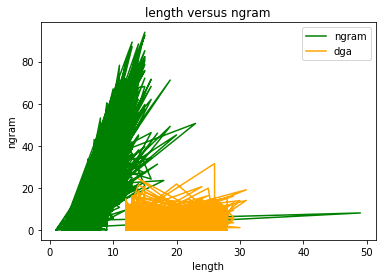

In [17]:
def line_plot_features():
    plt.figure()
    plt.plot(legit['length'], legit['ngram'], color = 'green', label = 'ngram')
    plt.plot(dga['length'], dga['ngram'], color = 'orange', label = 'dga')
    plt.legend()
    plt.title('length versus ngram')
    plt.xlabel('length')
    plt.ylabel('ngram')
    plt.show()    
line_plot_features()

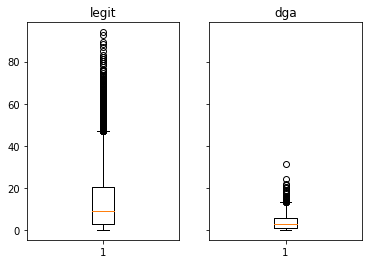

In [18]:
def box_plot_features():
    fig, (ax1, ax2) = plt.subplots(1, 2, sharey = True)
    ax1.boxplot(list(legit['ngram']))
    ax1.set_title('legit')
    ax2.boxplot(list(dga['ngram']))
    ax2.set_title('dga')
    plt.show()
    #ax2.boxplot(list(legit['ngram']))
    #plt.show()
box_plot_features()

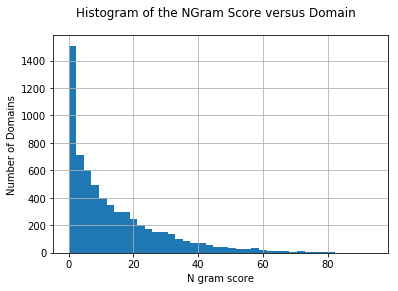

In [19]:
def hist_plot_features():
    fig, ax = plt.subplots(1, 1)
    legit = train_df[train_df['class'] == 'legit']
    ax = legit['ngram'].hist(bins = 40)
    ax.figure.suptitle('Histogram of the NGram Score versus Domain')
    plt.xlabel('N gram score')
    plt.ylabel('Number of Domains')
    plt.show()
    
hist_plot_features()    


C:\Users\chuck\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


Random Forest Classifier Results
Mean Accuracy Score: 0.998125
All Cross Validation Accuracy Scores [ 0.99812617  0.99875     0.998125    0.998125    0.99749844]
Mean Precision Score: 0.998752
All Cross Validation Precision Scores [ 0.99805068  0.99961014  0.99844237  0.99961014  0.99804764]
Single Split Score: 0.998750
Feature importances!
Feature length has importance: 0.480667
Feature entropy has importance: 0.397773
Feature ngram has importance: 0.121560


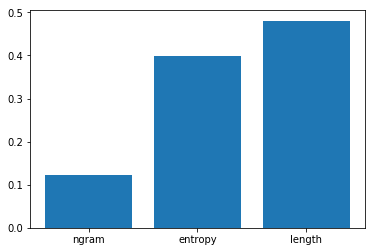

Percentage scores
dga/dga: 99.293286 (281/283)
dga/legit: 0.706714 (2/283)
legit/dga: 0.000000 (0/1317)
legit/legit: 100.000000 (1317/1317)


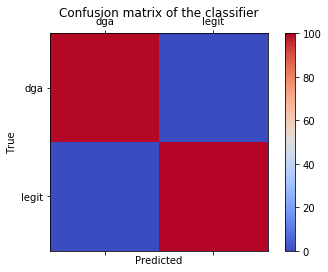

Multinomial Naive Bayes Results
Mean Accuracy Score: 0.782999
All Cross Validation Accuracy Scores [ 0.78825734  0.78875     0.77875     0.78125     0.77798624]
Mean Precision Score: 0.846406
All Cross Validation Precision Scores [ 0.85098901  0.85123239  0.84280639  0.84513274  0.84187082]
Single Split Score: 0.793750
Percentage scores
dga/dga: 93.636364 (309/330)
dga/legit: 6.363636 (21/330)
legit/dga: 24.330709 (309/1270)
legit/legit: 75.669291 (961/1270)


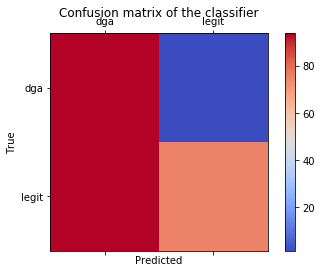

SVM Results
Mean Accuracy Score: 0.997875
All Cross Validation Accuracy Scores [ 0.99687695  0.9975      0.9975      0.999375    0.99812383]
Mean Precision Score: 0.998675
All Cross Validation Precision Scores [ 0.99805068  0.99844115  0.99844237  0.99961014  0.9988295 ]
Single Split Score: 0.995625
Feature importances!
Feature length has importance: -1.259067
Feature entropy has importance: -1.778687
Feature ngram has importance: 0.369147


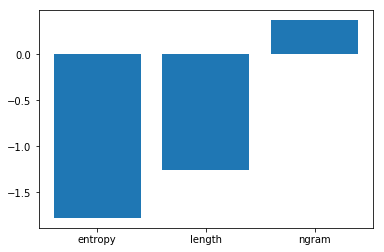

Percentage scores
dga/dga: 99.076923 (322/325)
dga/legit: 0.923077 (3/325)
legit/dga: 0.313725 (4/1275)
legit/legit: 99.686275 (1271/1275)


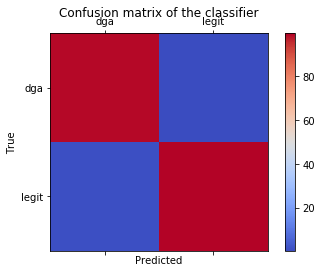

In [20]:
"""
vanilla model testing
cross validation scoring
train_test split scoring
confusion matrix plotting
feature importance plotting
testing three algorithms: naive bayes, random forest, and svm
"""

from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score

def test_clf(clf, X, y):
    #cross validation scoring
    accuracy_scores = sklearn.cross_validation.cross_val_score(clf, X, y, cv = 5, n_jobs = -1, scoring = 'accuracy')
    print 'Mean Accuracy Score: %f' % (accuracy_scores.mean())
    print 'All Cross Validation Accuracy Scores {}'.format(accuracy_scores)
    
    precision_scores = sklearn.cross_validation.cross_val_score(clf, X, y, cv = 5, n_jobs = -1, scoring = 'f1')
    print 'Mean Precision Score: %f' % (precision_scores.mean())
    print 'All Cross Validation Precision Scores {}'.format(precision_scores)
    
    
    #single split scoring
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    single_score = accuracy_score(y_test, y_pred)
    print 'Single Split Score: %f' %(single_score)
    
    features = ['length', 'entropy', 'ngram']
    #feature importances
    if isinstance(clf, sklearn.ensemble.RandomForestClassifier):
        print 'Feature importances!'
        for name, importance in zip(features, clf.feature_importances_):
            print 'Feature %s has importance: %f' % (name, importance)
        random_forest_feature_importances(clf.feature_importances_, features)
    elif isinstance(clf, sklearn.svm.SVC):
        print 'Feature importances!'
        for name, importance in zip(features, clf.coef_.ravel()):
            print 'Feature %s has importance: %f' % (name, importance)
        svm_feature_importances(clf.coef_.ravel(), features)
        
    cm = confusion_matrix(y_test, y_pred)
    plot_cm(cm, ['dga', 'legit'])
    
    
def svm_feature_importances(coef, names):
    plt.figure()
    imp, names = zip(*sorted(zip(coef, names)))
    #bar works like x range and height = y range, barh works in the EXACT same way
    plt.bar(range(len(names)), height = imp, align = 'center')
    #label x not y ticks with the range -> names mapping
    plt.xticks(range(len(names)), names)
    plt.show()   
    
def random_forest_feature_importances(coef, names):
    plt.figure()
    imp, names = zip(*sorted(zip(coef, names)))
    plt.bar(range(len(names)), height = imp, align = 'center')
    plt.xticks(range(len(names)), names)
    plt.show()
    

def plot_cm(cm, labels):
    tn, fp, fn, tp = cm.ravel()
    print 'Percentage scores'
    print '%s/%s: %f (%d/%d)' %(labels[0], labels[0], (100.0 * tn) / (tn + fp), tn, tn + fp)
    print '%s/%s: %f (%d/%d)' %(labels[0], labels[1], (100.0 * fp) / (tn + fp), fp, tn + fp)
    print '%s/%s: %f (%d/%d)' %(labels[1], labels[0], (100.0 * fn) / (tp + fn), fn, tp + fn)
    print '%s/%s: %f (%d/%d)' %(labels[1], labels[1], (100.0 * tp) / (tp + fn), tp, tp + fn)
    
    cumsum = cm.sum(axis = 1)
    cumsum = np.array(cumsum, dtype = 'float')
    percentages = (100.0 * cm) / cumsum
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    #ax.grid(b = False)
    cax = ax.matshow(percentages, cmap = 'coolwarm')
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
    
X = train_df.as_matrix(['length', 'entropy', 'ngram'])
y = train_df['class'].apply(lambda x : 0.0 if x == 'dga' else 1.0)
y = np.array(y.tolist())

print 'Random Forest Classifier Results'
clf = RandomForestClassifier()
test_clf(clf, X, y)

print 'Multinomial Naive Bayes Results'
clf = MultinomialNB()
test_clf(clf, X, y)

print 'SVM Results'
clf = SVC(kernel = 'linear')
test_clf(clf, X, y)



    
    

Best parameters found in Random Forest Grid Search
{'min_samples_split': 10, 'n_estimators': 50, 'max_depth': 5, 'min_samples_leaf': 10}
Score is 0.987 (+/-0.011) for parameters: {'min_samples_split': 3, 'n_estimators': 5, 'max_depth': 2, 'min_samples_leaf': 1}
Score is 0.993 (+/-0.011) for parameters: {'min_samples_split': 3, 'n_estimators': 20, 'max_depth': 2, 'min_samples_leaf': 1}
Score is 0.995 (+/-0.005) for parameters: {'min_samples_split': 3, 'n_estimators': 50, 'max_depth': 2, 'min_samples_leaf': 1}
Score is 0.994 (+/-0.006) for parameters: {'min_samples_split': 3, 'n_estimators': 100, 'max_depth': 2, 'min_samples_leaf': 1}
Score is 0.983 (+/-0.014) for parameters: {'min_samples_split': 10, 'n_estimators': 5, 'max_depth': 2, 'min_samples_leaf': 1}
Score is 0.986 (+/-0.013) for parameters: {'min_samples_split': 10, 'n_estimators': 20, 'max_depth': 2, 'min_samples_leaf': 1}
Score is 0.993 (+/-0.008) for parameters: {'min_samples_split': 10, 'n_estimators': 50, 'max_depth': 2, 'm

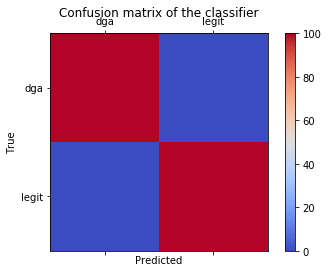

Best parameters found in SVM Grid Search
{'kernel': 'rbf', 'C': 1, 'gamma': 0.01}
Score is 0.896 (+/-0.006) for parameters: {'kernel': 'rbf', 'C': 0.1, 'gamma': 0.0001}
Score is 0.998 (+/-0.002) for parameters: {'kernel': 'linear', 'C': 0.1, 'gamma': 0.0001}
Score is 0.801 (+/-0.000) for parameters: {'kernel': 'poly', 'C': 0.1, 'gamma': 0.0001}
Score is 0.998 (+/-0.002) for parameters: {'kernel': 'rbf', 'C': 0.1, 'gamma': 0.001}
Score is 0.998 (+/-0.002) for parameters: {'kernel': 'linear', 'C': 0.1, 'gamma': 0.001}
Score is 0.869 (+/-0.007) for parameters: {'kernel': 'poly', 'C': 0.1, 'gamma': 0.001}
Score is 0.998 (+/-0.002) for parameters: {'kernel': 'rbf', 'C': 0.1, 'gamma': 0.01}
Score is 0.998 (+/-0.002) for parameters: {'kernel': 'linear', 'C': 0.1, 'gamma': 0.01}
Score is 0.999 (+/-0.002) for parameters: {'kernel': 'poly', 'C': 0.1, 'gamma': 0.01}
Score is 0.997 (+/-0.003) for parameters: {'kernel': 'rbf', 'C': 0.1, 'gamma': 0.1}
Score is 0.998 (+/-0.002) for parameters: {'kern

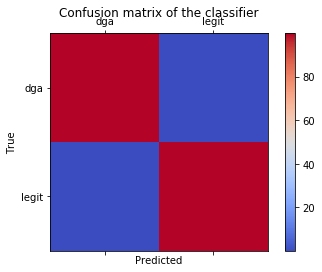

In [21]:
from sklearn.model_selection import GridSearchCV

def grid_search_eval(X, y, parameters, classifier, classifier_name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
    clf = GridSearchCV(classifier, parameters, cv = 5, scoring = 'accuracy', n_jobs = -1)
    clf.fit(X_train, y_train)
    print 'Best parameters found in {} Grid Search'.format(classifier_name)
    print clf.best_params_
    
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print 'Score is %.3f (+/-%.3f) for parameters: %r' % (mean, std * 2, params)
        
    y_pred = clf.predict(X_test)
    single_score = accuracy_score(y_test, y_pred)
    print '%s Grid Search Score: %f' %(classifier_name, single_score)
    cm = confusion_matrix(y_test, y_pred)
    plot_cm(cm, ['dga', 'legit'])
    return clf
    
random_forest_parameters = {
    "n_estimators" : [5, 20, 50, 100],
    "max_depth" : [2, 5, 10],
    "min_samples_split" : [3, 10],
    "min_samples_leaf" : [1, 3, 10]
}
svm_parameters = {
    "kernel" : ['rbf', 'linear', 'poly'],
    "C" : [0.1, 1, 10, 100],
    "gamma" : [1e-4, 1e-3, 1e-2, 1e-1] 
}

random_forest_clf = grid_search_eval(X, y, random_forest_parameters, RandomForestClassifier(), 'Random Forest')
svm_clf = grid_search_eval(X, y, svm_parameters, SVC(), 'SVM')
    

svm_vanilla classifier score: 0.9950000000
random_forest_vanilla classifier score: 0.9975000000
svm_tuned classifier score: 0.9970000000
random_forest_tuned classifier score: 0.9965000000
best classifier random_forest_vanilla with score 0.9975
Percentage scores
dga/dga: 100.000000 (414/414)
dga/legit: 0.000000 (0/414)
legit/dga: 0.315259 (5/1586)
legit/legit: 99.684741 (1581/1586)


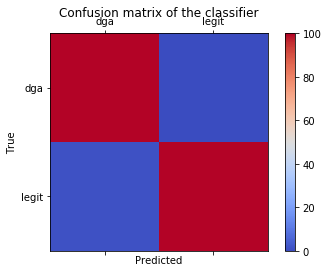

In [22]:
#test one on hold out data
def hold_out_test(classifiers, classifier_names):
    hold_X = hold_df.as_matrix(['length', 'entropy', 'ngram'])
    hold_y = hold_df['class'].apply(lambda x : 0.0 if x == 'dga' else 1.0)
    hold_y = np.array(hold_y.tolist())
    
    scores = []
    for classifier, name in zip(classifiers, classifier_names):
        y_pred = classifier.predict(hold_X)
        score = accuracy_score(hold_y, y_pred)
        print '%s classifier score: %.10f' % (name, score)
        scores.append((score, name, classifier))
    scores.sort(key = lambda x : x[0], reverse = True)
    print 'best classifier {} with score {}'.format(scores[0][1], scores[0][0])
    cm = confusion_matrix(hold_y, scores[0][2].predict(hold_X))
    plot_cm(cm, ['dga', 'legit'])
    return scores[0][2]

svm_vanilla = SVC()
svm_vanilla.fit(X, y)
random_forest_vanilla = RandomForestClassifier()
random_forest_vanilla.fit(X, y)
random_forest_clf = RandomForestClassifier(min_samples_split = 3, n_estimators = 5, max_depth = 5, min_samples_leaf = 1)
random_forest_clf.fit(X, y)
svm_clf = SVC(kernel = 'rbf', C = 1, gamma =  0.01)
svm_clf.fit(X, y)
all_classifiers = [svm_vanilla, random_forest_vanilla, svm_clf, random_forest_clf]
all_classifier_names = ['svm_vanilla', 'random_forest_vanilla', 'svm_tuned', 'random_forest_tuned']
best_classifier = hold_out_test(all_classifiers, all_classifier_names)


final test accuracy score for svm_vanilla is 0.949980
Percentage scores
dga/dga: 99.268964 (52280/52665)
dga/legit: 0.731036 (385/52665)
legit/dga: 7.770025 (6314/81261)
legit/legit: 92.229975 (74947/81261)


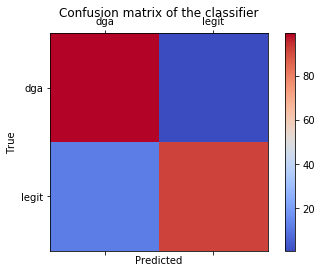

final test accuracy score for random_forest_vanilla is 0.937570
Percentage scores
dga/dga: 99.783537 (52551/52665)
dga/legit: 0.216463 (114/52665)
legit/dga: 10.148780 (8247/81261)
legit/legit: 89.851220 (73014/81261)


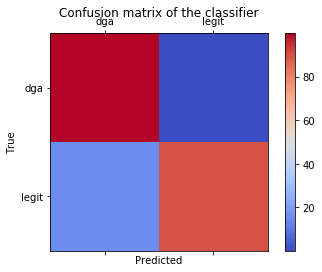

final test accuracy score for svm_tuned is 0.944522
Percentage scores
dga/dga: 99.658217 (52485/52665)
dga/legit: 0.341783 (180/52665)
legit/dga: 8.921869 (7250/81261)
legit/legit: 91.078131 (74011/81261)


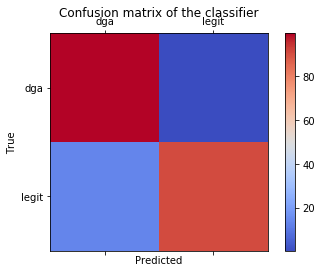

final test accuracy score for random_forest_tuned is 0.957506
Percentage scores
dga/dga: 99.221494 (52255/52665)
dga/legit: 0.778506 (410/52665)
legit/dga: 6.498812 (5281/81261)
legit/legit: 93.501188 (75980/81261)


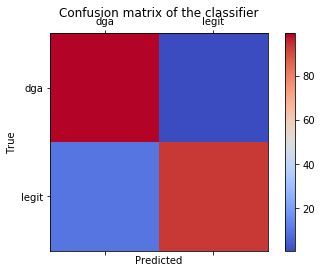

In [23]:
def final_test(classifiers, classifier_names):
    df = pd.read_csv('dga.csv', index_col = False)
    df.drop(['host', 'subclass'], axis = 1, inplace = True)
    df.sample(frac=0.1, replace=True)

    df['length'] = df.apply(lambda row: len(row.domain), axis = 1)
    df['entropy'] = df['domain'].apply(lambda x : entropy(x))
    df['ngram'] = dns_counts * dns_vc.transform(df['domain']).T
    df['class'] = df['class'].apply(lambda x : 0.0 if x == 'dga' else 1)
    
    X = df.as_matrix(['length', 'entropy', 'ngram'])
    y_test = np.array(df['class'].tolist())
    for classifier, name in zip(classifiers, classifier_names): 
        y_pred = classifier.predict(X)
        print 'final test accuracy score for %s is %f' %(name, accuracy_score(y_test, y_pred))
        cm = confusion_matrix(y_test, y_pred)
        plot_cm(cm, ['dga', 'legit'])
    
final_test(all_classifiers, all_classifier_names)